# Data Dive 2 - College Basketball Data
## By: Robert, Cayson, and William
## Due: 3/30/21

# What Is The End Goal: Predict The 68 Teams That Made the NCAA Tournament (37 At Large Qualifiers, 31 Automatic Qualifiers)
## We are going to clean the data, visualize the data to help discern patterns, and finally, we are going to do some predictive analysis to try and predict which teams made it to the NCAA Tournament.
## The data started very clean so we went through and deleted values at random in order to demonstrate a way to clean the data.


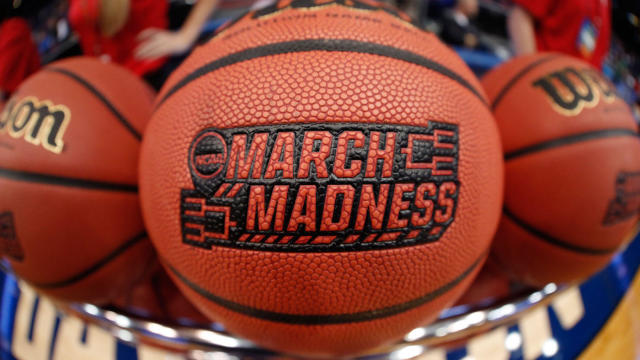

### Importing Appropriate Packages

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings

import missingno as msn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.sparse as sp
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Loading Data Into A Dataframe

In [91]:
basketball_clean_df = pd.read_csv("College_Basketball_Data.csv")
basketball_df = pd.read_csv("College_Basketball_Data_Dirty.csv")

Our Data: https://www.sports-reference.com/cbb/seasons/2021-school-stats.html

356 NCAA Division 1 Teams x 76 Variables Per Team

(We Dirtied The Data Up To Test Some Imputation Methods)

# DATA DICTIONARY:

School - The Name of the College (NCAA At the End Means They Made The Tournament, We Set Up A Separate Variable Later)

G - Games Played in the 2020-21 Season

W - Wins

L - Losses

W-L% - Wins / Total Games Played (% Of Games Won)

SRS - Simple Rating System (Summary Index Of How Good A Team Is, Mean = 0)

SOS - Strength Of Schedule (Index of Opponent Strength, Mean = 0)

Conf_W - Conference Wins

Conf_L - Conference Losses

Home_W - Home Wins

Home_L - Home Losses

Away_W - Away Wins

Away_L - Away Losses

Ppg_Team - Points Scored Per Game

Ppg_Opp - Points Allowed Per Game

MP_Team - Minutes Played

Team_FG_Team - Field Goals Made

FGA_Team - Field Goals Attempted

FG%_Team - Field Goal Percentage (FG / FGA)

3P_Team	- 3 Pointers Made

3PA_Team - 3 Pointers Attempted

3P%_Team - 3 Point Percentage (3P / 3PA)

FT_Team - Free Throws Made

FTA_Team - Free Throws Attempted

FT%_Team - Free Throw Percentage (FT / FTA)

ORB_Team - Offensive Rebounds

TRB_Team - Total Rebounds

AST_Team - Assists

STL_Team - Steals

BLK_Team - Blocks

TOV_Team - Turnovers

PF_Team - Personal Fouls

FG_Opp - Opponent Field Goals Made

FGA_Opp - Opponent Field Goals Attempted

FG%_Opp - Opponent Field Goal Percentage (FG / FGA)

3P_Opp - Opponent 3 Pointers Made

3PA_Opp - Opponent 3 Pointers Attempted

3P%_Opp - Opponent 3 Point Percentage (3P / 3PA)

FT_Opp - Opponent Free Throws Made

FTA_Opp - Opponent Free Throws Attempted

FT%_Opp - Oppoent Free Throw Percentage (FT / FTA)

ORB_Opp - Opponent Offensive Rebounds

TRB_Opp - Opponent Total Rebounds

AST_Opp - Opponent Assists

STL_Opp - Opponent Steals

BLK_Opp - Opponent Blocks

TOV_Opp - Opponent Turnovers

PF_Opp - Opponent Personal Fouls

Pace - Possessions Per Game

ORtg_Team -	Offensive Rating (Points Scored Per 100 Possessions)

FTr_Team - Free Throw rate (Free Throws Attempted Per Field Goal Attempted)

3PAr_Team -	3 Point Attempt rate (3PA / FGA)

TS%_Team - True Shooting Percentage (Field Goal% adjusted for 3-Pointers Being Harder To Make)

TRB%_Team -	Total Rebound Percentage (Team Rebounds / Team Rebounds + Opponent Rebounds)

AST%_Team -	Assist Percentage (% of Field Goals Made w/ Assist)

STL%_Team -	Steal Percentage (% of Defensive Possessions Ending In A Steal)

BLK%_Team -	Block Percentage (% of Opponent Field Goal Attempts Blocked)

eFG%_Team -	Effective Field Goal Percentage (Like TS%, but w/ a slightly higher emphasis on 3-Pointers)

TOV%_Team -	Turnover Percentage (% of Offensive Possessions Ending In A Turnover)

ORB%_Team - Offensive Rebound Percentage (% Of Available Offensive Rebounds Successfully Secured)

FT/FGA_Team	- Free Throws Made per Field Goal Attempt (A Good Measure of Effecient Free Throw Shooting)

DRtg - Defensive Rating (Points Allowed Per 100 Possessions)

FTr_Opp	- Opponent Free Throw rate (Opponent Free Throws Attempted Per Field Goal Attempted)

3PAr_Opp - Opponent 3 Point Attempt rate (Opponent 3PA / Opponent FGA)

TS%_Opp - Opponent True Shooting Percentage (Opponent Field Goal% adjusted for 3-Pointers Being Harder To Make)

TRB%_Opp - Opponent Total Rebound Percentage (Opponent Rebounds / Team Rebounds + Opponent Rebounds)

AST%_Opp - Opponent Assist Percentage (% Of Opponent Field Goals Made w/ Assist)

STL%_Opp - Opponent Steal Percentage (% of Offensive Possessions Ending In An Opponent Steal)

BLK%_Opp - Opponent Block Percentage (% of Tewam's Field Goals Attempted That Are Blocked By Opponent)

eFG%_Opp - Opponent Effective Field Goal Percentage (Like Opponent TS%, but w/ a slightly higher emphasis on 3-Pointers)

TOV%_Opp - Opponent Turnover Percentage (% of Defensive Possessions Ending in an Opponent Turnover)

ORB%_Opp - Opponent Offensive Rebound Percentage (% Of Opponent's Available Offensive Rebounds They Successfully Grab)

FT/FGA_Opp - Opponent Free Throws Made per Field Goal Attempt (A Measure of Opponent's Free Throw Efficiency)

Made_NCAA_Tournament - 1/0 (1 = Made NCAA Tournament, 0 = Did Not Make NCAA Tournament)

Automatic_Qualifier	- 1/0 (1 = Earned Conference's Automatic Bid, 0 = Did Not Earn Conference's AUtomatic Bid)

At_Large - 1/0 (1 = Earned An At-Large Selection From The Committee, 0 = Did Not Earn an At-Large Selection)

# Imputation - Cayson

In [92]:
# SHow the top five rows in the dataframe
basketball_df.head()

Rk                  School   G     W   L   W-L%    SRS    SOS  Conf_W  \
0   1  Abilene Christian NCAA  29  24.0   5  0.828   6.22  -6.42    13.0   
1   2               Air Force  25   5.0  20  0.200 -12.88   0.33     3.0   
2   3                   Akron  23  15.0   8  0.652   2.04  -1.78    12.0   
3   4             Alabama A&M  15   6.0   9  0.400 -18.81 -14.94     4.0   
4   5            Alabama NCAA  32  26.0   6  0.813  20.16   9.98    16.0   

   Conf_L  Home_W  Home_L  Away_W  Away_L  Ppg_Team  Ppg_Opp  MP_Team  \
0     2.0    13.0     0.0     5.0     4.0      75.7     60.4     40.0   
1    17.0     3.0     8.0     1.0    10.0      58.7     71.9     40.0   
2     6.0     9.0     1.0     5.0     5.0      78.2     72.2     40.4   
3     9.0     5.0     2.0     1.0     7.0      63.3     67.2     40.7   
4     2.0    12.0     1.0     7.0     3.0      79.7     69.5     40.0   

   Team_FG_Team  FGA_Team  FG%_Team  3P_Team  3PA_Team  3P%_Team  FT_Team  \
0          27.1      60.4     0.449     7.62      22.2     0.344     13.9   
1          20.9      46.8     0.446     6.96      21.1     0.330     10.0   
2          27.3      61.5     0.444     9.43      28.3     0.333     14.1   
3          23.1      57.9     0.400     5.53      19.1     0.290     11.5   
4          27.9      64.3     0.435    10.70      30.0     0.355     13.2   

   FTA_Team  FT%_Team  ORB_Team  TRB_Team  AST_Team  STL_Team  BLK_Team  \
0      20.5     0.678      11.3      36.1      17.7      9.72      2.97   
1      14.4     0.693       4.4      23.2      12.3      7.08      2.48   
2      18.7     0.758      11.4      38.9      13.3      4.91      3.65   
3      18.4     0.627      10.7      38.5      11.0      5.47      3.60   
4      18.3     0.719      12.4      40.5      14.2      8.56      4.31   

   TOV_Team  PF_Team  FG_Opp  FGA_Opp  FG%_Opp  3P_Opp  3PA_Opp  3P%_Opp  \
0      13.6     19.1   601.0   1488.0    0.404   161.0    520.0    0.310   
1      14.4     16.6   654.0   1309.0    0.500   194.0    530.0    0.366   
2      11.8     18.0   621.0   1435.0    0.433   151.0    486.0    0.311   
3      15.3     18.2   350.0    891.0    0.393    84.0    297.0    0.283   
4      13.9     18.1   808.0   1979.0    0.408   195.0    675.0    0.289   

   FT_Opp  FTA_Opp  FT%_Opp  ORB_Opp  TRB_Opp  AST_Opp  STL_Opp  BLK_Opp  \
0   390.0    573.0    0.681    263.0    985.0    299.0    189.0    110.0   
1   296.0    430.0    0.688    258.0    865.0    368.0    150.0     53.0   
2   267.0    375.0    0.712    253.0    837.0    279.0    129.0     51.0   
3   224.0    333.0    0.673    172.0    582.0    188.0    121.0     40.0   
4   414.0    605.0    0.684    366.0   1212.0    356.0    253.0    154.0   

   TOV_Opp  PF_Opp  Pace  ORtg_Team  FTr_Team  3PAr_Team  TS%_Team  TRB%_Team  \
0    578.0   580.0  72.0      105.2     0.339      0.367     0.540       51.5   
1    348.0   418.0  63.9       91.9     0.309      0.450     0.547       40.1   
2    274.0   422.0  70.1      110.2     0.303      0.461     0.555       51.7   
3    192.0   251.0  70.1       88.9     0.318      0.329     0.475       49.8   
4    498.0   578.0  74.7      106.7     0.286      0.467     0.546       51.7   

   AST%_Team  STL%_Team  BLK%_Team  eFG%_Team  TOV%_Team  ORB%_Team  \
0       65.3       13.5        8.9      0.512       16.2       31.3   
1       59.0       11.1        8.0      0.521       21.2       15.3   
2       48.6        6.9        8.9      0.520       14.3       31.0   
3       47.6        7.7        9.1      0.448       18.6       28.1   
4       50.9       11.5       10.6      0.518       16.0       31.9   

   FT/FGA_Team   DRtg  FTr_Opp  3PAr_Opp  TS%_Opp  TRB%_Opp  AST%_Opp  \
0        0.230   84.0    0.385     0.349    0.498      48.5      49.8   
1        0.214  112.5    0.328     0.405    0.594      59.9      56.3   
2        0.230  101.8    0.261     0.339    0.515      48.3      44.9   
3        0.199   94.3    0.374     0.333    0.480      50.2      53.7   


In [93]:
# Count every null value in the dataset
basketball_df.isnull().sum().sum()

682

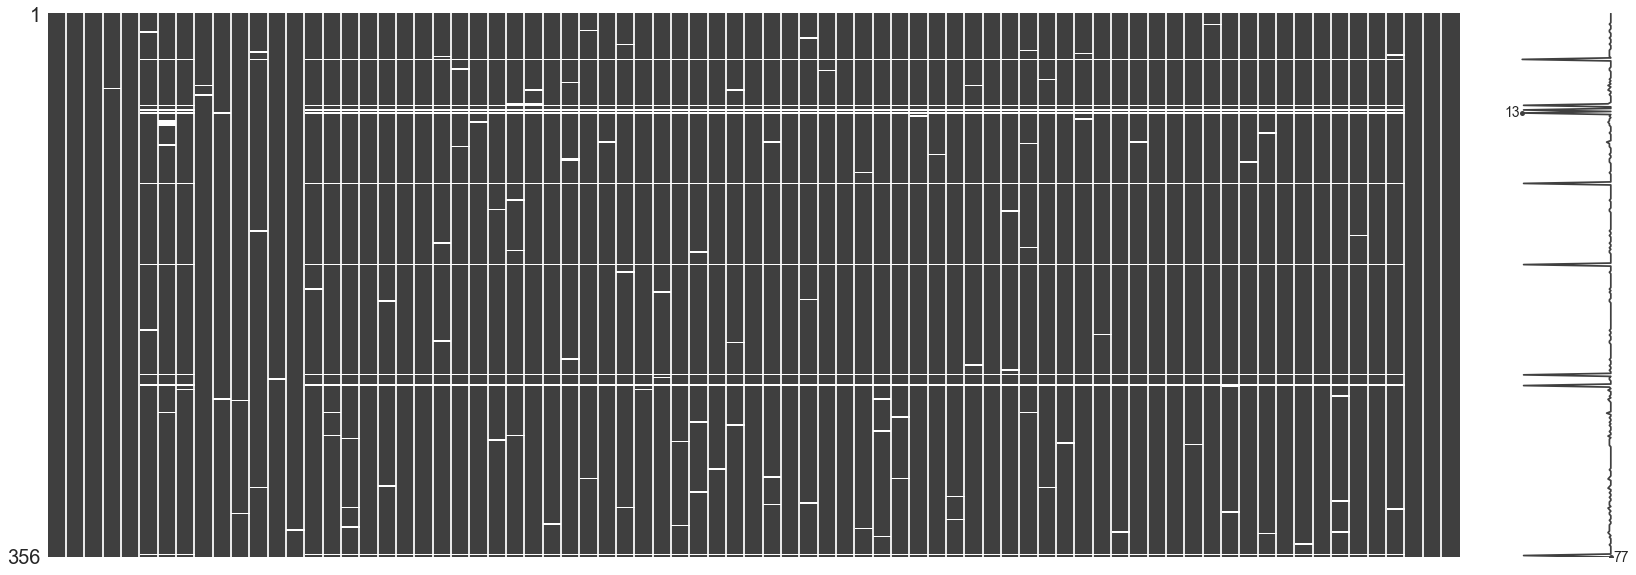

In [94]:
# Plot the data to find the missing values
msn.matrix(basketball_df);

## From the data, we can see the random values missing from the dataset.
## There are also almost entire rows of data missing. With Robert's domain knowledge, we were able to acertain that those rows coincide with teams that didn't play this season.

The number of missing values per row for a team to have not played in the season is: 63 and 64


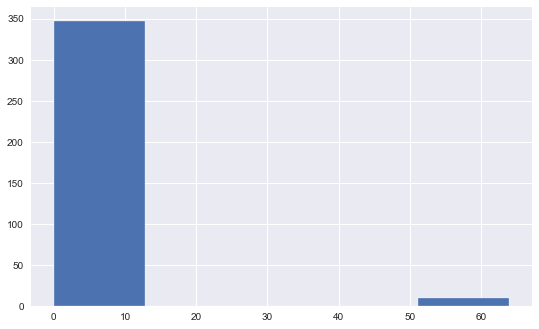

In [95]:
# Find the total amount of missing values per row
# https://stackoverflow.com/questions/30059260/python-pandas-counting-the-number-of-missing-nan-in-each-row
missing_rows = basketball_df.isnull().sum(axis=1).tolist()

plt.hist(missing_rows, bins = 5);
print("The number of missing values per row for a team to have not played in the season is:", max(missing_rows) - 1, "and", max(missing_rows ))

In [96]:
# Remove every row with 63 or 64 values missing
for row in range(len(missing_rows)):
    if missing_rows[row] == 63 or missing_rows[row] == 64: # The amount of missing values in a column if the team didn't play
        basketball_clean_df = basketball_clean_df.drop(row) # Drop the team from the clean dataset
        basketball_df = basketball_df.drop(row) # Drop the team from the dirty dataset

## Below is a method for imputing missing data.
## This model is from the sklearn library and it imputes missing values based on the values around them. 
## The model defaults to the Bayesian Ridge estimator model which is a regularized linear regression model. However, A Decision Tree model and a K Nearest Neigbors model are among the other options for impuation.

More information is at http://scikit-learn.org/stable/modules/impute.html

In [97]:
# Copy the dataframe and remove the string School variable to allows the model to work
basketball_copy_df = basketball_df.copy().drop(["School"], axis = 1)

In [98]:
# This is the meat of the imputer
# https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
imp = IterativeImputer(max_iter = 356) # Iterate over the entire dataset to find estimate the best value
imp.fit(basketball_copy_df) # Fit the model to our dataset
df_cbb = imp.transform(basketball_copy_df) # Add the fitted model and new values to a dataframe
df_cbb = pd.DataFrame(df_cbb, columns = basketball_copy_df.columns) # Add the columns back to the dataframe

In [99]:
# Sync the indices of the dataframes 
basketball_df = basketball_df.set_index(df_cbb.index)
basketball_clean_df = basketball_clean_df.set_index(df_cbb.index)

In [100]:
# Insert the the School column back into the cleaned dataframe
df_cbb.insert(1, "School", basketball_df["School"])

In [101]:
# Count the number of missing values in the original dirty dataset
basketball_df.isnull().sum().sum()

113

In [102]:
# Count the number of missing values in the cleaned dataset
df_cbb.isnull().sum().sum()

0

## As can be seen below, the datatype can change upon running the imputation. Here, a lot of the values have been changed from integers to floats. This is just something of which to be aware.

In [103]:
basketball_df.head()

Rk                  School   G     W   L   W-L%    SRS    SOS  Conf_W  \
0   1  Abilene Christian NCAA  29  24.0   5  0.828   6.22  -6.42    13.0   
1   2               Air Force  25   5.0  20  0.200 -12.88   0.33     3.0   
2   3                   Akron  23  15.0   8  0.652   2.04  -1.78    12.0   
3   4             Alabama A&M  15   6.0   9  0.400 -18.81 -14.94     4.0   
4   5            Alabama NCAA  32  26.0   6  0.813  20.16   9.98    16.0   

   Conf_L  Home_W  Home_L  Away_W  Away_L  Ppg_Team  Ppg_Opp  MP_Team  \
0     2.0    13.0     0.0     5.0     4.0      75.7     60.4     40.0   
1    17.0     3.0     8.0     1.0    10.0      58.7     71.9     40.0   
2     6.0     9.0     1.0     5.0     5.0      78.2     72.2     40.4   
3     9.0     5.0     2.0     1.0     7.0      63.3     67.2     40.7   
4     2.0    12.0     1.0     7.0     3.0      79.7     69.5     40.0   

   Team_FG_Team  FGA_Team  FG%_Team  3P_Team  3PA_Team  3P%_Team  FT_Team  \
0          27.1      60.4     0.449     7.62      22.2     0.344     13.9   
1          20.9      46.8     0.446     6.96      21.1     0.330     10.0   
2          27.3      61.5     0.444     9.43      28.3     0.333     14.1   
3          23.1      57.9     0.400     5.53      19.1     0.290     11.5   
4          27.9      64.3     0.435    10.70      30.0     0.355     13.2   

   FTA_Team  FT%_Team  ORB_Team  TRB_Team  AST_Team  STL_Team  BLK_Team  \
0      20.5     0.678      11.3      36.1      17.7      9.72      2.97   
1      14.4     0.693       4.4      23.2      12.3      7.08      2.48   
2      18.7     0.758      11.4      38.9      13.3      4.91      3.65   
3      18.4     0.627      10.7      38.5      11.0      5.47      3.60   
4      18.3     0.719      12.4      40.5      14.2      8.56      4.31   

   TOV_Team  PF_Team  FG_Opp  FGA_Opp  FG%_Opp  3P_Opp  3PA_Opp  3P%_Opp  \
0      13.6     19.1   601.0   1488.0    0.404   161.0    520.0    0.310   
1      14.4     16.6   654.0   1309.0    0.500   194.0    530.0    0.366   
2      11.8     18.0   621.0   1435.0    0.433   151.0    486.0    0.311   
3      15.3     18.2   350.0    891.0    0.393    84.0    297.0    0.283   
4      13.9     18.1   808.0   1979.0    0.408   195.0    675.0    0.289   

   FT_Opp  FTA_Opp  FT%_Opp  ORB_Opp  TRB_Opp  AST_Opp  STL_Opp  BLK_Opp  \
0   390.0    573.0    0.681    263.0    985.0    299.0    189.0    110.0   
1   296.0    430.0    0.688    258.0    865.0    368.0    150.0     53.0   
2   267.0    375.0    0.712    253.0    837.0    279.0    129.0     51.0   
3   224.0    333.0    0.673    172.0    582.0    188.0    121.0     40.0   
4   414.0    605.0    0.684    366.0   1212.0    356.0    253.0    154.0   

   TOV_Opp  PF_Opp  Pace  ORtg_Team  FTr_Team  3PAr_Team  TS%_Team  TRB%_Team  \
0    578.0   580.0  72.0      105.2     0.339      0.367     0.540       51.5   
1    348.0   418.0  63.9       91.9     0.309      0.450     0.547       40.1   
2    274.0   422.0  70.1      110.2     0.303      0.461     0.555       51.7   
3    192.0   251.0  70.1       88.9     0.318      0.329     0.475       49.8   
4    498.0   578.0  74.7      106.7     0.286      0.467     0.546       51.7   

   AST%_Team  STL%_Team  BLK%_Team  eFG%_Team  TOV%_Team  ORB%_Team  \
0       65.3       13.5        8.9      0.512       16.2       31.3   
1       59.0       11.1        8.0      0.521       21.2       15.3   
2       48.6        6.9        8.9      0.520       14.3       31.0   
3       47.6        7.7        9.1      0.448       18.6       28.1   
4       50.9       11.5       10.6      0.518       16.0       31.9   

   FT/FGA_Team   DRtg  FTr_Opp  3PAr_Opp  TS%_Opp  TRB%_Opp  AST%_Opp  \
0        0.230   84.0    0.385     0.349    0.498      48.5      49.8   
1        0.214  112.5    0.328     0.405    0.594      59.9      56.3   
2        0.230  101.8    0.261     0.339    0.515      48.3      44.9   
3        0.199   94.3    0.374     0.333    0.480      50.2      53.7   


In [104]:
df_cbb.head()

Rk                  School     G     W     L   W-L%    SRS    SOS  Conf_W  \
0  1.0  Abilene Christian NCAA  29.0  24.0   5.0  0.828   6.22  -6.42    13.0   
1  2.0               Air Force  25.0   5.0  20.0  0.200 -12.88   0.33     3.0   
2  3.0                   Akron  23.0  15.0   8.0  0.652   2.04  -1.78    12.0   
3  4.0             Alabama A&M  15.0   6.0   9.0  0.400 -18.81 -14.94     4.0   
4  5.0            Alabama NCAA  32.0  26.0   6.0  0.813  20.16   9.98    16.0   

   Conf_L  Home_W  Home_L  Away_W  Away_L  Ppg_Team  Ppg_Opp  MP_Team  \
0     2.0    13.0     0.0     5.0     4.0      75.7     60.4     40.0   
1    17.0     3.0     8.0     1.0    10.0      58.7     71.9     40.0   
2     6.0     9.0     1.0     5.0     5.0      78.2     72.2     40.4   
3     9.0     5.0     2.0     1.0     7.0      63.3     67.2     40.7   
4     2.0    12.0     1.0     7.0     3.0      79.7     69.5     40.0   

   Team_FG_Team  FGA_Team  FG%_Team  3P_Team  3PA_Team  3P%_Team  FT_Team  \
0          27.1      60.4     0.449     7.62      22.2     0.344     13.9   
1          20.9      46.8     0.446     6.96      21.1     0.330     10.0   
2          27.3      61.5     0.444     9.43      28.3     0.333     14.1   
3          23.1      57.9     0.400     5.53      19.1     0.290     11.5   
4          27.9      64.3     0.435    10.70      30.0     0.355     13.2   

   FTA_Team  FT%_Team  ORB_Team  TRB_Team  AST_Team  STL_Team  BLK_Team  \
0      20.5     0.678      11.3      36.1      17.7      9.72      2.97   
1      14.4     0.693       4.4      23.2      12.3      7.08      2.48   
2      18.7     0.758      11.4      38.9      13.3      4.91      3.65   
3      18.4     0.627      10.7      38.5      11.0      5.47      3.60   
4      18.3     0.719      12.4      40.5      14.2      8.56      4.31   

   TOV_Team  PF_Team  FG_Opp  FGA_Opp  FG%_Opp  3P_Opp  3PA_Opp  3P%_Opp  \
0      13.6     19.1   601.0   1488.0    0.404   161.0    520.0    0.310   
1      14.4     16.6   654.0   1309.0    0.500   194.0    530.0    0.366   
2      11.8     18.0   621.0   1435.0    0.433   151.0    486.0    0.311   
3      15.3     18.2   350.0    891.0    0.393    84.0    297.0    0.283   
4      13.9     18.1   808.0   1979.0    0.408   195.0    675.0    0.289   

   FT_Opp  FTA_Opp  FT%_Opp  ORB_Opp  TRB_Opp  AST_Opp  STL_Opp  BLK_Opp  \
0   390.0    573.0    0.681    263.0    985.0    299.0    189.0    110.0   
1   296.0    430.0    0.688    258.0    865.0    368.0    150.0     53.0   
2   267.0    375.0    0.712    253.0    837.0    279.0    129.0     51.0   
3   224.0    333.0    0.673    172.0    582.0    188.0    121.0     40.0   
4   414.0    605.0    0.684    366.0   1212.0    356.0    253.0    154.0   

   TOV_Opp  PF_Opp  Pace  ORtg_Team  FTr_Team  3PAr_Team  TS%_Team  TRB%_Team  \
0    578.0   580.0  72.0      105.2     0.339      0.367     0.540       51.5   
1    348.0   418.0  63.9       91.9     0.309      0.450     0.547       40.1   
2    274.0   422.0  70.1      110.2     0.303      0.461     0.555       51.7   
3    192.0   251.0  70.1       88.9     0.318      0.329     0.475       49.8   
4    498.0   578.0  74.7      106.7     0.286      0.467     0.546       51.7   

   AST%_Team  STL%_Team  BLK%_Team  eFG%_Team  TOV%_Team  ORB%_Team  \
0       65.3       13.5        8.9      0.512       16.2       31.3   
1       59.0       11.1        8.0      0.521       21.2       15.3   
2       48.6        6.9        8.9      0.520       14.3       31.0   
3       47.6        7.7        9.1      0.448       18.6       28.1   
4       50.9       11.5       10.6      0.518       16.0       31.9   

   FT/FGA_Team   DRtg  FTr_Opp  3PAr_Opp  TS%_Opp  TRB%_Opp  AST%_Opp  \
0        0.230   84.0    0.385     0.349    0.498      48.5      49.8   
1        0.214  112.5    0.328     0.405    0.594      59.9      56.3   
2        0.230  101.8    0.261     0.339    0.515      48.3      44.9   
3        0.199   94.3    0.374     0.333    

# Now that we have filled in the null values, let's check the accuracy of our imputations with our original, clean dataset.

In [105]:
# Find the coordinates on the original dataframe containing the nulls
# Source: https://stackoverflow.com/questions/33641231/retrieve-indices-of-nan-values-in-a-pandas-dataframe

row, col = sp.coo_matrix(basketball_df.isnull()).nonzero()

null_loc = list(zip(row, col))

93.81% of the imputed data is within 10 percent of the actual data.


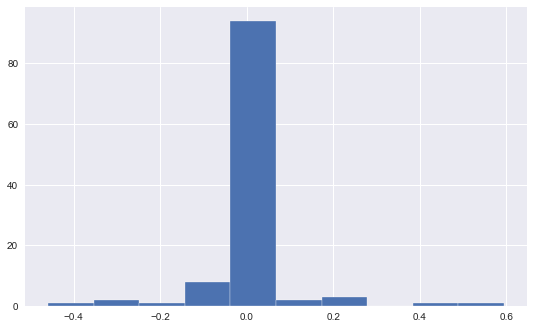

In [106]:
num_correct = 0
num_wrong = 0
off_by = []

# Iterate through the cordinate list and compare the values in the dataframes at those locations
for coord in null_loc:
    # Find out how far the two values are to graph
    if basketball_clean_df.iloc[coord[0], coord[1]] == df_cbb.iloc[coord[0], coord[1]]:
        off_by.append(0)
    else:
        off_by.append(basketball_clean_df.iloc[coord[0], coord[1]] / df_cbb.iloc[coord[0], coord[1]]-1)
    
    # Find out how far the values are to check percent accuracy
    if basketball_clean_df.iloc[coord[0], coord[1]] == df_cbb.iloc[coord[0], coord[1]]: 
        num_correct += 1 # Ensures there is no division by zero
    elif  basketball_clean_df.iloc[coord[0], coord[1]] / df_cbb.iloc[coord[0], coord[1]] < 1.1 and basketball_clean_df.iloc[coord[0], coord[1]] / df_cbb.iloc[coord[0], coord[1]] > -1.1:
        num_correct += 1 # The new and old data is within 10 percent of each other
    else:
        num_wrong += 1

# Graph the difference between values
plt.hist(off_by, bins = 10)
        
print(format(num_correct/(num_correct+num_wrong)*100, ".2f"), "%", " of the imputed data is within 10 percent of the actual data.", sep = "")

# Data Visualization / EDA - William

In [107]:
df_cbb_1 = pd.DataFrame(df_cbb, columns = ['W-L%','ORtg_Team','DRtg','eFG%_Team','eFG%_Opp','TOV%_Team','TOV%_Opp',
                        'ORB%_Team','ORB%_Opp','FT/FGA_Team','FT/FGA_Opp','SRS','SOS'])
df_cbb_1.head()

W-L%  ORtg_Team   DRtg  eFG%_Team  eFG%_Opp  TOV%_Team  TOV%_Opp  \
0  0.828      105.2   84.0      0.512     0.458       16.2      24.7   
1  0.200       91.9  112.5      0.521     0.574       21.2      18.7   
2  0.652      110.2  101.8      0.520     0.485       14.3      14.5   
3  0.400       88.9   94.3      0.448     0.440       18.6      15.5   
4  0.813      106.7   93.1      0.518     0.458       16.0      18.0   

   ORB%_Team  ORB%_Opp  FT/FGA_Team  FT/FGA_Opp    SRS    SOS  
0       31.3      26.8        0.230       0.262   6.22  -6.42  
1       15.3      35.4        0.214       0.226 -12.88   0.33  
2       31.0      28.6        0.230       0.186   2.04  -1.78  
3       28.1      29.2        0.199       0.251 -18.81 -14.94  
4       31.9      28.9        0.205       0.209  20.16   9.98

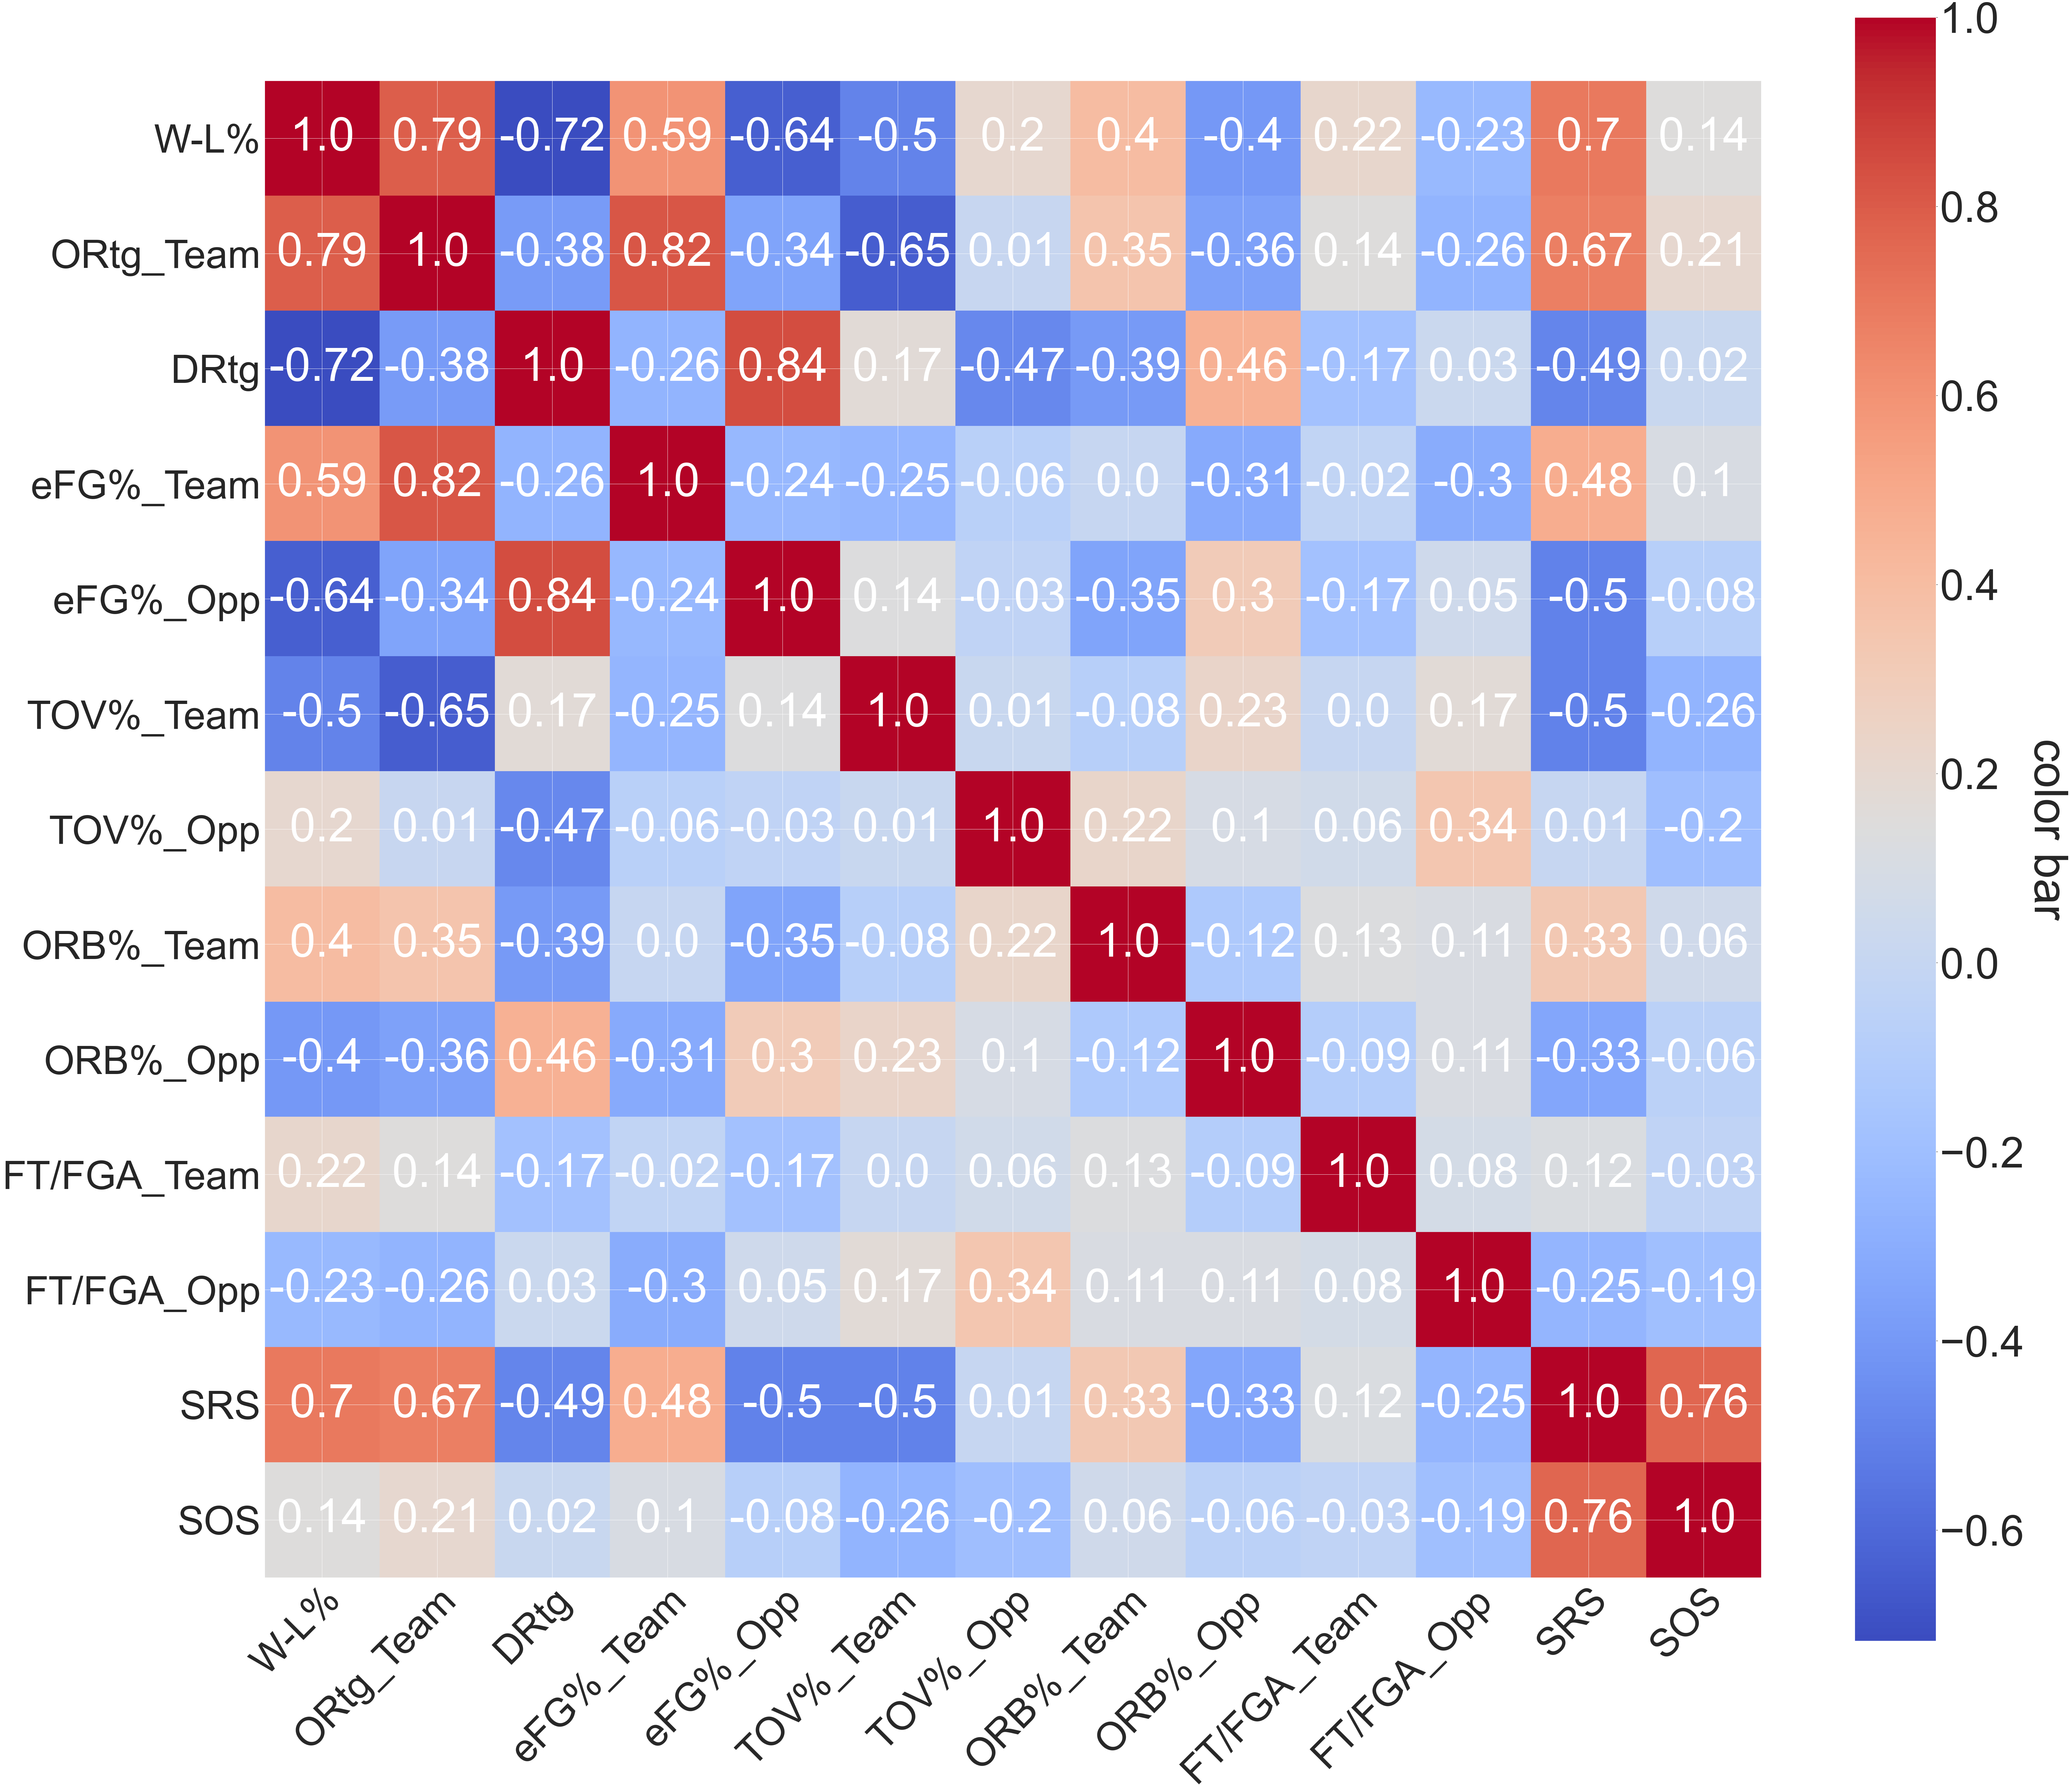

In [124]:
correlation = df_cbb_1.corr()
fig , ax = plt.subplots(figsize=(100,100))
k = ax.imshow(correlation, cmap = 'coolwarm')
sns.set(font_scale=13)

ax.set_xticks(np.arange(len(correlation.columns)))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.columns)


cbar = ax.figure.colorbar(k, ax=ax)
cbar.ax.set_ylabel('color bar', rotation=-90, va="bottom")
plt.setp(ax.get_xticklabels(),rotation = 45, ha="right", rotation_mode="anchor");

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        text = ax.text(j,i, np.around(correlation.iloc[i,j],
                                      decimals=2), ha="center", va="center", color="White")
        
plt.show() 

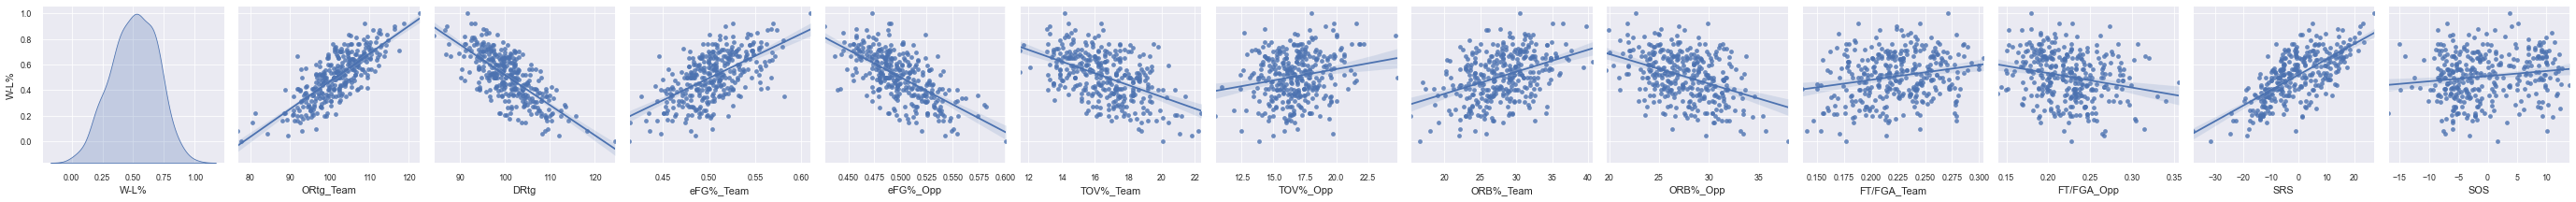

In [126]:
x = sns.pairplot(df_cbb_1, y_vars=['W-L%'], height = 3,kind="reg", diag_kind="kde")
sns.set_context("paper", rc={"axes.labelsize":12});
plt.show()

In [110]:
### SEE BELOW CELLS FOR JointGrid Output

#g = sns.JointGrid(data=df_cbb_1, x='ORtg_Team', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='DRtg', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='eFG%_Team', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='eFG%_Opp', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='TOV%_Team', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='TOV%_Opp', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='ORB%_Team', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='ORB%_Opp', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='FT/FGA_Team', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='FT/FGA_Opp', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='SRS', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

#g = sns.JointGrid(data=df_cbb_1, x='SOS', y="W-L%")
#g.plot_joint(sns.scatterplot, s=100, alpha=.5)
#g.plot_marginals(sns.histplot, kde=True)

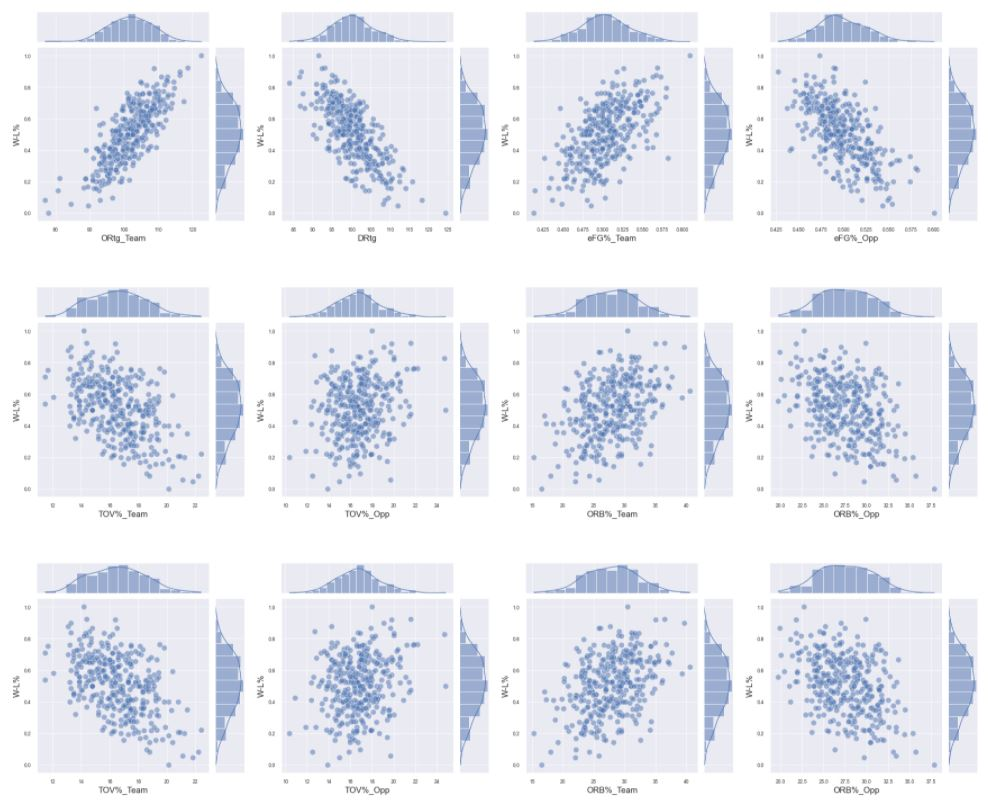

# Logistic Regresison - Robert

#### Recall Our Original Goal... To Correctly Use A Predictive Model To Identify The 68 NCAA Tournament Teams

#### How are we going to do that? - Logistic Regression

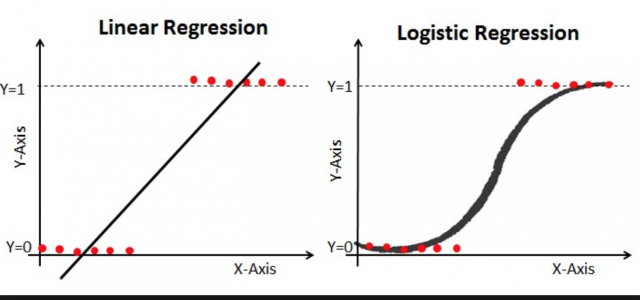

In [111]:
#These are the packages we will be needing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [112]:
#Sets up our target variable (Whether or not the team made the NCAA Tournament)
y = df_cbb.Made_NCAA_Tournament # Separating a target variable

#Since we want to use all of the relevant data to predict the Team's odds of making the tournament, let's drop just a few
X = df_cbb.drop(['School', 'Made_NCAA_Tournament', 'Automatic_Qualifier', 'At_Large'], axis = 1)
X.head()

Rk     G     W     L   W-L%    SRS    SOS  Conf_W  Conf_L  Home_W  Home_L  \
0  1.0  29.0  24.0   5.0  0.828   6.22  -6.42    13.0     2.0    13.0     0.0   
1  2.0  25.0   5.0  20.0  0.200 -12.88   0.33     3.0    17.0     3.0     8.0   
2  3.0  23.0  15.0   8.0  0.652   2.04  -1.78    12.0     6.0     9.0     1.0   
3  4.0  15.0   6.0   9.0  0.400 -18.81 -14.94     4.0     9.0     5.0     2.0   
4  5.0  32.0  26.0   6.0  0.813  20.16   9.98    16.0     2.0    12.0     1.0   

   Away_W  Away_L  Ppg_Team  Ppg_Opp  MP_Team  Team_FG_Team  FGA_Team  \
0     5.0     4.0      75.7     60.4     40.0          27.1      60.4   
1     1.0    10.0      58.7     71.9     40.0          20.9      46.8   
2     5.0     5.0      78.2     72.2     40.4          27.3      61.5   
3     1.0     7.0      63.3     67.2     40.7          23.1      57.9   
4     7.0     3.0      79.7     69.5     40.0          27.9      64.3   

   FG%_Team  3P_Team  3PA_Team  3P%_Team  FT_Team  FTA_Team  FT%_Team  \
0     0.449     7.62      22.2     0.344     13.9      20.5     0.678   
1     0.446     6.96      21.1     0.330     10.0      14.4     0.693   
2     0.444     9.43      28.3     0.333     14.1      18.7     0.758   
3     0.400     5.53      19.1     0.290     11.5      18.4     0.627   
4     0.435    10.70      30.0     0.355     13.2      18.3     0.719   

   ORB_Team  TRB_Team  AST_Team  STL_Team  BLK_Team  TOV_Team  PF_Team  \
0      11.3      36.1      17.7      9.72      2.97      13.6     19.1   
1       4.4      23.2      12.3      7.08      2.48      14.4     16.6   
2      11.4      38.9      13.3      4.91      3.65      11.8     18.0   
3      10.7      38.5      11.0      5.47      3.60      15.3     18.2   
4      12.4      40.5      14.2      8.56      4.31      13.9     18.1   

   FG_Opp  FGA_Opp  FG%_Opp  3P_Opp  3PA_Opp  3P%_Opp  FT_Opp  FTA_Opp  \
0   601.0   1488.0    0.404   161.0    520.0    0.310   390.0    573.0   
1   654.0   1309.0    0.500   194.0    530.0    0.366   296.0    430.0   
2   621.0   1435.0    0.433   151.0    486.0    0.311   267.0    375.0   
3   350.0    891.0    0.393    84.0    297.0    0.283   224.0    333.0   
4   808.0   1979.0    0.408   195.0    675.0    0.289   414.0    605.0   

   FT%_Opp  ORB_Opp  TRB_Opp  AST_Opp  STL_Opp  BLK_Opp  TOV_Opp  PF_Opp  \
0    0.681    263.0    985.0    299.0    189.0    110.0    578.0   580.0   
1    0.688    258.0    865.0    368.0    150.0     53.0    348.0   418.0   
2    0.712    253.0    837.0    279.0    129.0     51.0    274.0   422.0   
3    0.673    172.0    582.0    188.0    121.0     40.0    192.0   251.0   
4    0.684    366.0   1212.0    356.0    253.0    154.0    498.0   578.0   

   Pace  ORtg_Team  FTr_Team  3PAr_Team  TS%_Team  TRB%_Team  AST%_Team  \
0  72.0      105.2     0.339      0.367     0.540       51.5       65.3   
1  63.9       91.9     0.309      0.450     0.547       40.1       59.0   
2  70.1      110.2     0.303      0.461     0.555       51.7       48.6   
3  70.1       88.9     0.318      0.329     0.475       49.8       47.6   
4  74.7      106.7     0.286      0.467     0.546       51.7       50.9   

   STL%_Team  BLK%_Team  eFG%_Team  TOV%_Team  ORB%_Team  FT/FGA_Team   DRtg  \
0       13.5        8.9      0.512       16.2       31.3        0.230   84.0   
1       11.1        8.0      0.521       21.2       15.3        0.214  112.5   
2        6.9        8.9      0.520       14.3       31.0        0.230  101.8   
3        7.7        9.1      0.448       18.6       28.1        0.199   94.3   
4       11.5       10.6      0.518       16.0       31.9        0.205   93.1   

   FTr_Opp  3PAr_Opp  TS%_Opp  TRB%_Opp  AST%_Opp  STL%_Opp  BLK%_Opp  \
0    0.385     0.349    0.498      48.5      49.8       9.1       9.9   
1    0.328     0.405    0.594      59.9      56.3       9.4       8.2   
2    0.261     0.339    0.515      48.3      44.9       7.9       6.7   
3    0.374     0.333    0.480      50.2      53.7      11.3       6.

In [113]:
logreg = LogisticRegression()
logreg.fit(X, y)

score = logreg.score(X, y)
print(score)

log_pred = logreg.predict(X) # predict on the test data X_test
logexport_prob = logreg.predict_proba(X) # returns the probability for both class labels

cm = pd.DataFrame(confusion_matrix(y, log_pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

0.9394812680115274


C:\Users\cayso\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Predicted   No  Yes
True               
No         272    7
Yes         14   54

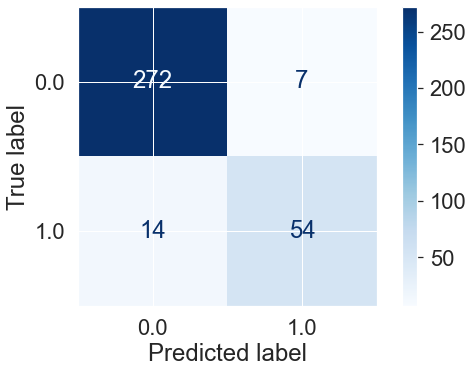

In [114]:
sns.set(font_scale=2)

plot_confusion_matrix(logreg, X, y,cmap="Blues", values_format='d')
plt.show()

### The model crushed it, correctly predicting 54 of the 68 overall bids, and only misassigning 7 bids to teams that didn't make it!

### This gives us an accuracy of 79.4% in predicting the teams earning bids.

### Here's a little more info on the NCAA Tournament. The Conference winners are automatically granted a big, called an "Automatic Qualifier". This is likely given to a team that would've already gotten in in the top leagues (i.e. BigTen, Big12, SEC, etc.), but in the bottom leagues, the teams that earn this spot still aren't that good, and thus their only way in is through an Automatic Bid, instead of the coveted At-Large bids given to the best of the rest that don't automatically qualify.

### With that being said, let's try and predict the "At Large" field as that will give us a good feel as to how the model is assigning bids to the best of the best teams.

In [115]:
y = df_cbb.At_Large # Separating a target variable

#Since we want to use all of the relevant data to predict the Team's odds of making the tournament, let's drop just a few
X = df_cbb.drop(['School', 'Made_NCAA_Tournament', 'Automatic_Qualifier', 'At_Large'], axis = 1)

In [116]:
logreg2 = LogisticRegression()
logreg2.fit(X, y)

score = logreg2.score(X, y)
print(score)

log_pred2 = logreg2.predict(X) # predict on the test data X_test
logexport2_prob = logreg2.predict_proba(X) # returns the probability for both class labels

cm = pd.DataFrame(confusion_matrix(y, log_pred2), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

0.9538904899135446


C:\Users\cayso\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Predicted   No  Yes
True               
No         303    7
Yes          9   28

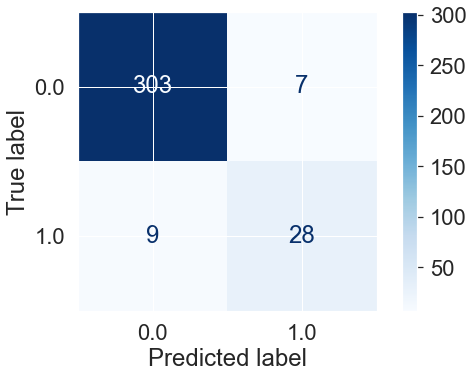

In [117]:
plot_confusion_matrix(logreg2, X, y,cmap="Blues", values_format='d')
plt.show() 

### Our model correctly identified 30 of the 37 At Large teams this year. Missing 7 of them and incorrectly awarding 7 bids in the process.

### Overall this gives us an At Large accuracy of 81.1% in awarding At Large Bids.

In [118]:
log_pred = pd.DataFrame(log_pred) #formatting as a pandas data frame
log_pred = log_pred.rename(columns = {0:'NCAA_Tournament_Predict_Log'})#rename the predicted df of class laebls to Predict_Log
logexport_prob = pd.DataFrame(logexport_prob)#formatting logexport_prob as a pandas data frame
logexport_prob = logexport_prob.rename(columns = {0:'Prob_Not_Making_Tournament', 1:'Prob_Making_Tournament'})# since we coded  high =1 and low = 0

log_pred2 = pd.DataFrame(log_pred2) #formatting as a pandas data frame
log_pred2 = log_pred2.rename(columns = {0:'At_Large_Predict_Log'})#rename the predicted df of class laebls to Predict_Log
logexport2_prob = pd.DataFrame(logexport2_prob)#formatting logexport_prob as a pandas data frame
logexport2_prob = logexport2_prob.rename(columns = {0:'Prob_No_At_Large', 1:'Prob_At_Large'})# since we coded  high =1 and low = 0

#Lets Up A Dataframe w/ School Name and Real Results
Logistic_Results = df_cbb.drop(['G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Conf_W', 'Conf_L', 'Home_W', 'Home_L', 'Away_W', 'Away_L', 'Ppg_Team', 'Ppg_Opp', 'MP_Team', 'Team_FG_Team', 'FGA_Team', 'FG%_Team', '3P_Team', '3PA_Team', '3P%_Team', 'FT_Team', 'FTA_Team', 'FT%_Team', 'ORB_Team', 'TRB_Team', 'AST_Team', 'STL_Team', 'BLK_Team', 'TOV_Team', 'PF_Team', 'FG_Opp', 'FGA_Opp', 'FG%_Opp', '3P_Opp', '3PA_Opp', '3P%_Opp', 'FT_Opp', 'FTA_Opp', 'FT%_Opp', 'ORB_Opp', 'TRB_Opp', 'AST_Opp', 'STL_Opp', 'BLK_Opp', 'TOV_Opp', 'PF_Opp', 'Pace', 'ORtg_Team', 'FTr_Team', '3PAr_Team', 'TS%_Team', 'TRB%_Team', 'AST%_Team', 'STL%_Team', 'BLK%_Team', 'eFG%_Team', 'TOV%_Team', 'ORB%_Team', 'FT/FGA_Team', 'DRtg', 'FTr_Opp', '3PAr_Opp', 'TS%_Opp', 'TRB%_Opp', 'AST%_Opp', 'STL%_Opp', 'BLK%_Opp', 'eFG%_Opp', 'TOV%_Opp', 'ORB%_Opp', 'FT/FGA_Opp'], axis=1)

Logistic_Results = Logistic_Results.reset_index()

#Showing the Logistic_Results Df
Logistic_Results = pd.concat([Logistic_Results, log_pred], axis = 1 )#concatenate the data with the predicted labels
Logistic_Results = pd.concat([Logistic_Results, logexport_prob], axis = 1 )#concatenate the data with the predicted labels
Logistic_Results = pd.concat([Logistic_Results, log_pred2], axis = 1 )#concatenate the data with the predicted labels
Logistic_Results = pd.concat([Logistic_Results, logexport2_prob], axis = 1 )#concatenate the data with the predicted labels

#Making Separate Dataframes For Analysis
Tournament_results = Logistic_Results.drop(['Automatic_Qualifier', 'At_Large', 'At_Large_Predict_Log', 'Prob_No_At_Large', 'Prob_At_Large'], axis = 1)
At_Large_results = Logistic_Results.drop(['Automatic_Qualifier', 'NCAA_Tournament_Predict_Log', 'Prob_Not_Making_Tournament', 'Prob_Making_Tournament'], axis = 1)

In [119]:
pd.set_option('display.max_rows', None)
round(Tournament_results.sort_values(by='Prob_Making_Tournament', ascending=False),2)

index     Rk                          School  Made_NCAA_Tournament  \
112    112  118.0                    Houston NCAA                   1.0   
4        4    5.0                    Alabama NCAA                   1.0   
167    167  174.0                   Michigan NCAA                   1.0   
116    116  122.0                   Illinois NCAA                   1.0   
101    101  106.0                    Gonzaga NCAA                   1.0   
275    275  284.0        Southern California NCAA                   1.0   
297    297  306.0                      Texas NCAA                   1.0   
61      61   65.0                  Creighton NCAA                   1.0   
300    300  309.0                 Texas Tech NCAA                   1.0   
145    145  151.0            Louisiana State NCAA                   1.0   
57      57   59.0                   Colorado NCAA                   1.0   
290    290  299.0                  Tennessee NCAA                   1.0   
13      13   14.0                   Arkansas NCAA                   1.0   
89      89   94.0              Florida State NCAA                   1.0   
222    222  229.0             Oklahoma State NCAA                   1.0   
20      20   21.0                     Baylor NCAA                   1.0   
220    220  227.0                 Ohio State NCAA                   1.0   
257    257  266.0            San Diego State NCAA                   1.0   
149    149  155.0                Loyola (IL) NCAA                   1.0   
70      70   75.0                      Drake NCAA                   1.0   
130    130  136.0                     Kansas NCAA                   1.0   
324    324  333.0      Virginia Commonwealth NCAA                   1.0   
162    162  169.0                         Memphis                   0.0   
227    227  234.0               Oregon State NCAA                   1.0   
305    305  314.0                          Toledo                   0.0   
341    341  350.0                  Wisconsin NCAA                   1.0   
318    318  327.0                 Utah State NCAA                   1.0   
237    237  246.0                     Purdue NCAA                   1.0   
157    157  163.0                   Maryland NCAA                   1.0   
123    123  129.0                       Iowa NCAA                   1.0   
139    139  145.0                    Liberty NCAA                   1.0   
0        0    1.0          Abilene Christian NCAA                   1.0   
325    325  334.0                   Virginia NCAA                   1.0   
280    280  289.0            St. Bonaventure NCAA                   1.0   
315    315  324.0                       UCLA NCAA                   1.0   
29      29   30.0              Brigham Young NCAA                   1.0   
323    323  332.0                  Villanova NCAA                   1.0   
59      59   62.0                Connecticut NCAA                   1.0   
208    208  215.0                North Texas NCAA                   1.0   
226    226  233.0                     Oregon NCAA                   1.0   
175    175  182.0                   Missouri NCAA                   1.0   
203    203  210.0  North Carolina-Greensboro NCAA                   1.0   
146    146  152.0                  Louisiana Tech                   0.0   
326    326  335.0              Virginia Tech NCAA                   1.0   
246    246  255.0                    Rutgers NCAA                   1.0   
338    338  347.0              Wichita State NCAA                   1.0   
103    103  108.0               Grand Canyon NCAA                   1.0   
200    200  207.0             North Carolina NCAA                   1.0   
52      52   54.0                    Clemson NCAA                   1.0   
11      11   12.0                         Arizona                   0.0   
120    120  126.0                         Indiana                   0.0   
58      58   60.0                  Colorado State                   0.0   
6        6    7.0             

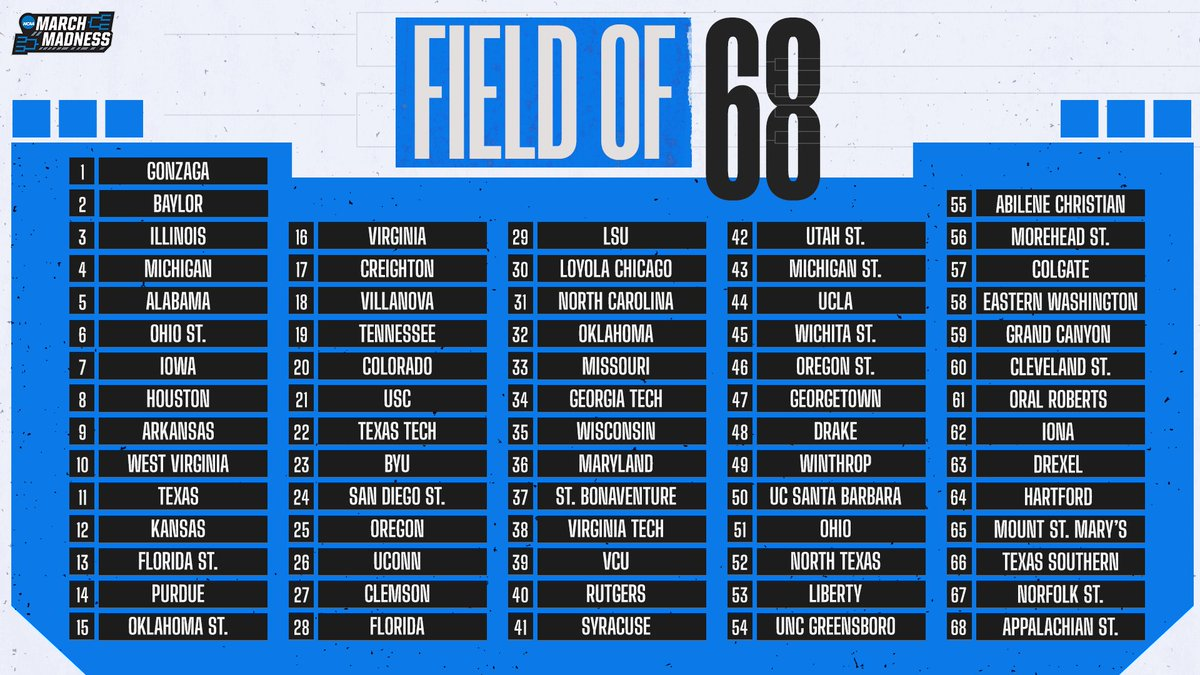

#### Teams We Awarded Bids To That Didn't Make It(8): Memphis, Toledo, Louisiana Tech, Arizona, Indiana, Colorado St, Nevada, Boise St.

#### All 8 Of These Teams Were In The Conversation for Winning Their Conference Tournaments In The Last Weekend, and Just Fell Short

#### Teams We Didn't Award Bids To That Did Make It (15): Morehead St., Colgate, Oral Roberts, Cleveland St., Georgia Tech, Eastern Washington, Norfolk St., Ohio, Georgetown, Appalachian St., Texas Southern, Hartford, Mt. St. Mary's, Iona, Drexel

#### Every One Of These Teams Was a Conference Tournament Winner, Thus an Automatic Qualifier. This is why we wanted to do a separate regression for At Large Bids.

In [120]:
pd.set_option('display.max_rows', None)
round(At_Large_results.sort_values(by='Prob_At_Large', ascending=False),2)

index     Rk                          School  Made_NCAA_Tournament  \
325    325  334.0                   Virginia NCAA                   1.0   
89      89   94.0              Florida State NCAA                   1.0   
167    167  174.0                   Michigan NCAA                   1.0   
226    226  233.0                     Oregon NCAA                   1.0   
290    290  299.0                  Tennessee NCAA                   1.0   
287    287  296.0                   Syracuse NCAA                   1.0   
130    130  136.0                     Kansas NCAA                   1.0   
275    275  284.0        Southern California NCAA                   1.0   
246    246  255.0                    Rutgers NCAA                   1.0   
220    220  227.0                 Ohio State NCAA                   1.0   
157    157  163.0                   Maryland NCAA                   1.0   
315    315  324.0                       UCLA NCAA                   1.0   
323    323  332.0                  Villanova NCAA                   1.0   
123    123  129.0                       Iowa NCAA                   1.0   
221    221  228.0                   Oklahoma NCAA                   1.0   
61      61   65.0                  Creighton NCAA                   1.0   
145    145  151.0            Louisiana State NCAA                   1.0   
200    200  207.0             North Carolina NCAA                   1.0   
112    112  118.0                    Houston NCAA                   1.0   
52      52   54.0                    Clemson NCAA                   1.0   
237    237  246.0                     Purdue NCAA                   1.0   
222    222  229.0             Oklahoma State NCAA                   1.0   
297    297  306.0                      Texas NCAA                   1.0   
59      59   62.0                Connecticut NCAA                   1.0   
57      57   59.0                   Colorado NCAA                   1.0   
326    326  335.0              Virginia Tech NCAA                   1.0   
333    333  342.0              West Virginia NCAA                   1.0   
341    341  350.0                  Wisconsin NCAA                   1.0   
4        4    5.0                    Alabama NCAA                   1.0   
227    227  234.0               Oregon State NCAA                   1.0   
262    262  271.0                      Seton Hall                   0.0   
300    300  309.0                 Texas Tech NCAA                   1.0   
280    280  289.0            St. Bonaventure NCAA                   1.0   
116    116  122.0                   Illinois NCAA                   1.0   
13      13   14.0                   Arkansas NCAA                   1.0   
101    101  106.0                    Gonzaga NCAA                   1.0   
20      20   21.0                     Baylor NCAA                   1.0   
257    257  266.0            San Diego State NCAA                   1.0   
168    168  175.0             Michigan State NCAA                   1.0   
324    324  333.0      Virginia Commonwealth NCAA                   1.0   
345    345  354.0                          Xavier                   0.0   
100    100  105.0               Georgia Tech NCAA                   1.0   
338    338  347.0              Wichita State NCAA                   1.0   
88      88   93.0                    Florida NCAA                   1.0   
173    173  180.0               Mississippi State                   0.0   
96      96  101.0                 Georgetown NCAA                   1.0   
29      29   30.0              Brigham Young NCAA                   1.0   
70      70   75.0                      Drake NCAA                   1.0   
318    318  327.0                 Utah State NCAA                   1.0   
283    283  292.0                        Stanford                   0.0   
282    282  291.0                 St. John's (NY)                   0.0   
217    217  224.0                      Notre Dame                   0.0   
251    251  260.0             

#### Teams We Awarded An At Large Bid To That Didn't Receive One (1): Seton Hall

#### Teams We Didn't Award An At Large Bid To That Did Receive One (11): Virginia Tech, Wisconsin, St. Bonaventure, Florida, Michigan St, Wichita St, VCU, Drake, Missouri, Utah St, West Virginia

#### Of These 11 Teams, 3 of them were part of the last 4 teams selected by the committee, thus we appropriately gave them roughly a 50% chance to make it.

# Conclusion

## Using a Multiple Imputation technique that did 356 passes over our data we were able to replicate nearly identical results to our original clean data. 

## The only major changes that occured using this technique were the chance of our teams making it changed, however the teams predicted largely remained the same. 

## Once we were able to see the results from the imputation we were able to build a predictive model that was able to predict with 95% accuracy the 68 teams that would make it into the Tournement.  

## From there, we were able to use deductive reasoning to award the remaining Automatic-Qualifying & At-Large bids with only 3 total mistakes. 

## Therefore, In The End We Were Able To Predict 65 Of The 68 Teams Participating In This Year's March Madness.

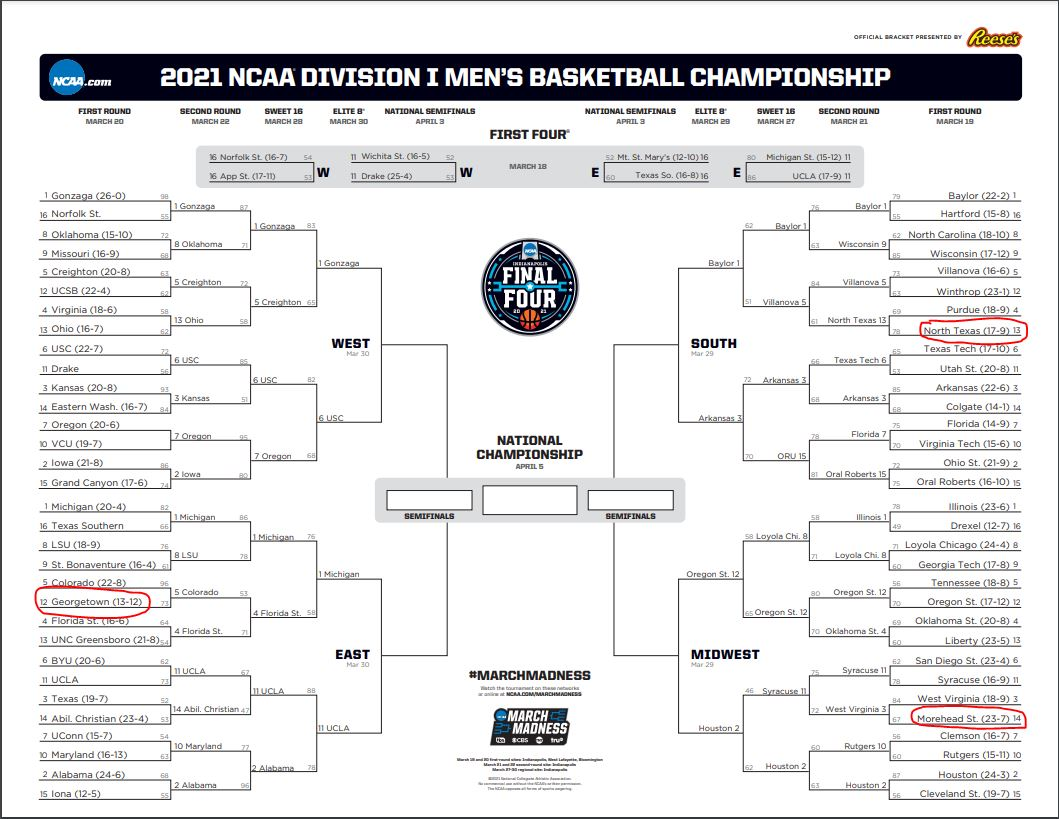